# Problem Statement :

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

Our task is to find region using classification and find the average price using regression.

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# Getting the dataset

df=pd.read_csv("avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Displaying the first 10 rows of the dataset.

We can drop the first column which is just indexing.

In [3]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Hence that first column is successfully droped.

Now let us understand the meaning of the features present in our dataset :

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

# Exploratory Data Analysis :

In [5]:
# Checking the features of the dataset

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
# Checking shape of the dataset

df.shape

(18249, 13)

There are too many columns.

In [7]:
# Checking datatype of the dataset

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

So from here we can observe that most of the features are float datatype, only 'year' is int datatype and 'type' and 'region' are object datatype. 

In [8]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here we can observe that all the 18249 rows, for all the columns, are non null, that is there are no null values.

And memory used by the dataset is 1.8+ MB.

In [9]:
# Checking for null values

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From here we are sure that there are no null values

We can also visualize and check :

In [10]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

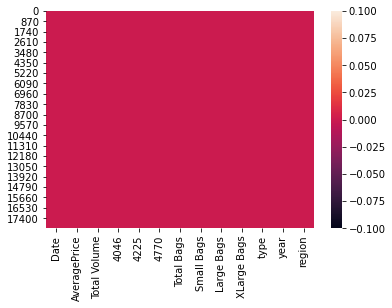

In [11]:
sns.heatmap(df.isnull())

From the above heatmap visualization we can observe that there are no white spaces, hence no null values.

In [12]:
# Checking various factors of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


Observations :
    
    1. For all the columns count is same since there are no null values.
    2. Outliers might be present in 'XLarge Bags' since there is much difference in values.
    3. 'Total Volume' has mean value greater than median, which indicates skewed data might be present.
    4. 'Small Bags' and 'XLarge Bags' have much difference between 75th percentile and max value, which indicates outliers are present.

In [13]:
# Now lets analize each feature and also check if there is any categorical and string data present.

df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

So here we can observe that 'type' and 'year' features are categorical data and rest are continuous data

In [14]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

So there are 2 categories in 'type', conventional and organic

In [15]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

And there are 4 years in 'year', that is 2015, 2016, 2017 and 2018.

Now lets check their counts through visualization :

<AxesSubplot:xlabel='type', ylabel='count'>

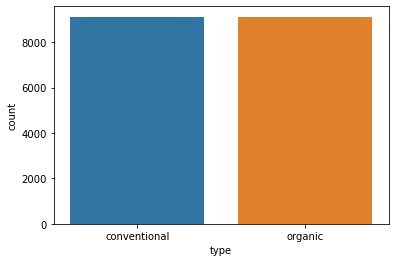

In [16]:
sns.countplot(x='type', data=df)

In [17]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

So here we can observe that there is no unbalanced data in this category.

<AxesSubplot:xlabel='year', ylabel='count'>

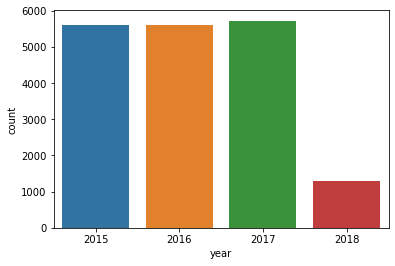

In [18]:
sns.countplot(x='year', data=df)

In [19]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

But here, for the 2018 category data is very less compared to the others, which signifies less and imbalanced data. But we don't need to handle that because 'year' is not the target column.

There are some columns which are not numeric, hence first lets convert them into numeric and proceed further into the project.

# Label Encoding :

In [20]:
# Importing the required library

from sklearn import preprocessing

In [21]:
le=preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
df['Date']=le.fit_transform(df['Date'])

In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


Hence, 'Date', 'type' and 'region' are converted into numeric columns.

In [23]:
# Checking Skewness of the dataset

df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

The data is fairly symmetrical if the skewness is between +/-0.5.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

Observations :

    1. 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', and 'XLarge Bags' are the highly skewed features.
    
We can also check through visualization :

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

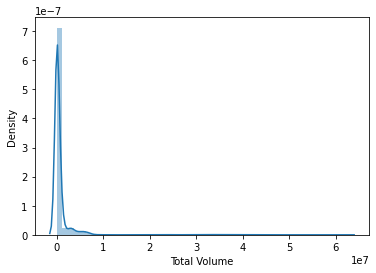

In [24]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

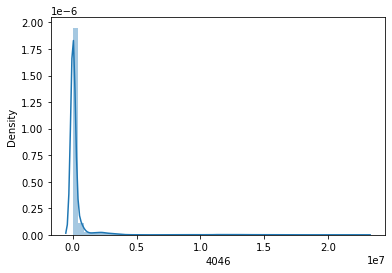

In [25]:
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

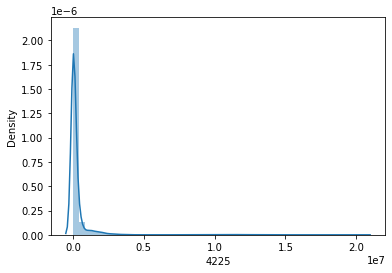

In [26]:
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

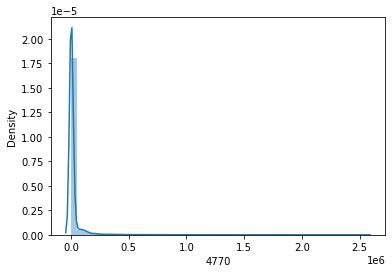

In [27]:
sns.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

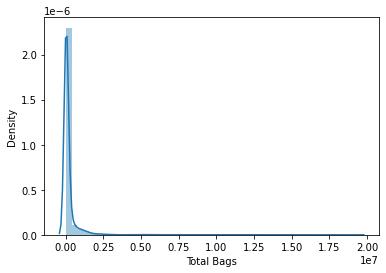

In [28]:
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

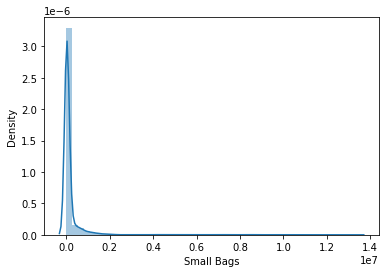

In [29]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

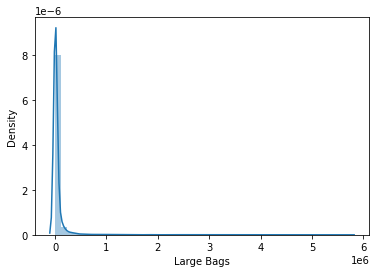

In [30]:
sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

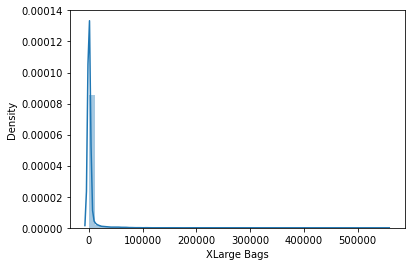

In [31]:
sns.distplot(df['XLarge Bags'])

So we need to handle these columns as they are highly skewed.

In [32]:
# First lets import required library

import numpy as np

In [33]:
df['Total Volume']=np.sqrt(df['Total Volume'])
df['4046']=np.sqrt(df['4046'])
df['4225']=np.sqrt(df['4225'])
df['4770']=np.sqrt(df['4770'])
df['Total Bags']=np.sqrt(df['Total Bags'])
df['Small Bags']=np.sqrt(df['Small Bags'])
df['Large Bags']=np.sqrt(df['Large Bags'])
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [34]:
df.skew()

Date            0.000117
AveragePrice    0.580303
Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.128864
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
type            0.000329
year            0.215339
region          0.000030
dtype: float64

So here we can observe that the skewness has reduced to much extend, but still some skewness is visible. But i would like to proceed further with these values and work on it later in the project.

# Univariate Analysis :

First lets see the categorical plots :
    
    In this dataset we have 2 categorical features : 'type' and 'year'.
    
Countplot :

<AxesSubplot:xlabel='type', ylabel='count'>

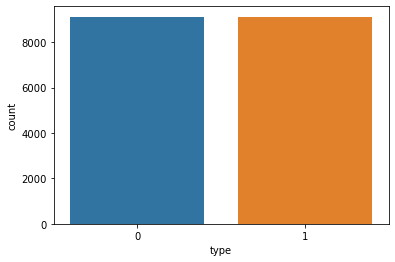

In [35]:
sns.countplot(x='type', data=df)

Here we can observe that there are 2 categories in 'type' and both are equal in count.

<AxesSubplot:xlabel='year', ylabel='count'>

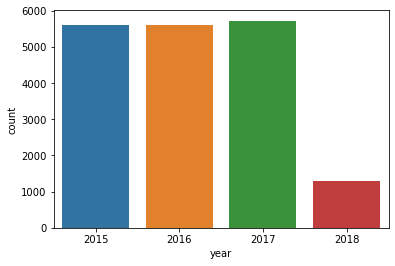

In [36]:
sns.countplot(x='year', data=df)

Here we can observe that the 'year' 2018 is less in count.

Catplot :

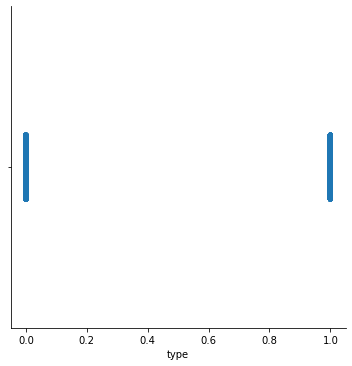

In [37]:
sns.catplot(x='type', data=df)

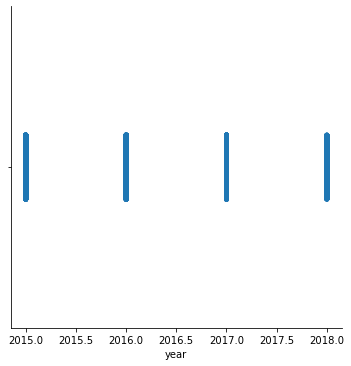

In [38]:
sns.catplot(x='year', data=df)

Violinplot :

<AxesSubplot:xlabel='type'>

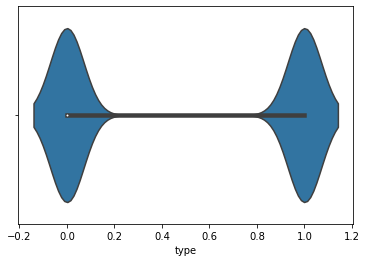

In [39]:
sns.violinplot(x='type',data=df)

Here also we have the same observations that the categories of 'type' are equal.

<AxesSubplot:xlabel='year'>

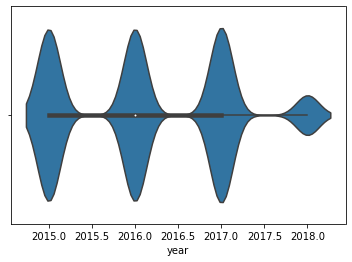

In [40]:
sns.violinplot(x='year',data=df)

Here also we can clearly observe that the density of 2018 category is less.

Now lets continue with rest of the data :
    
Distribution plot :

In [42]:
import matplotlib.pyplot as plt

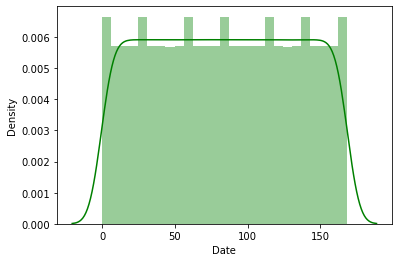

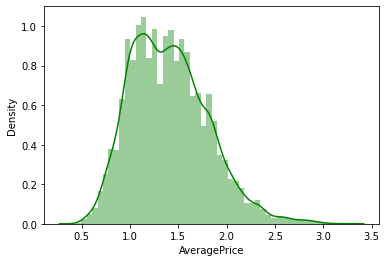

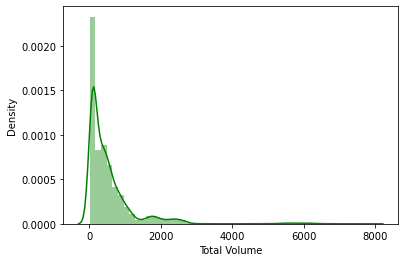

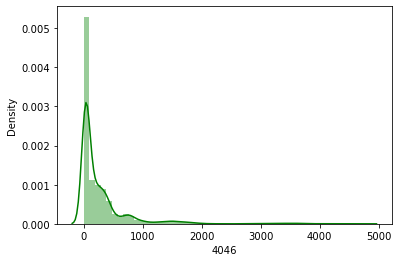

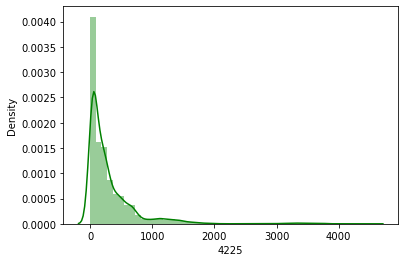

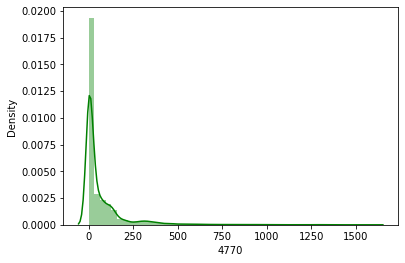

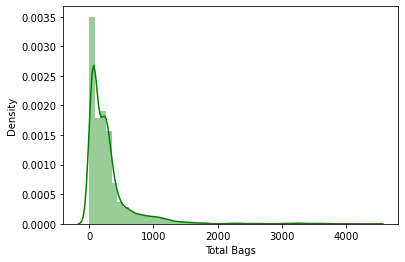

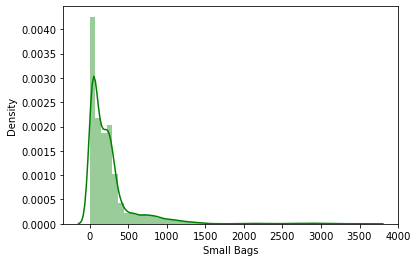

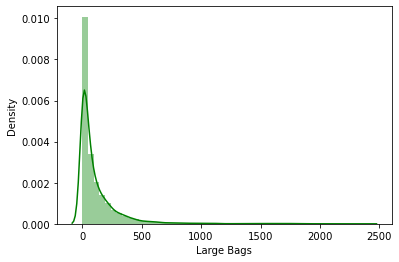

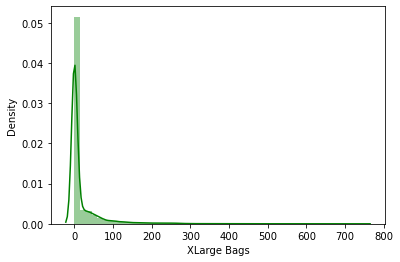

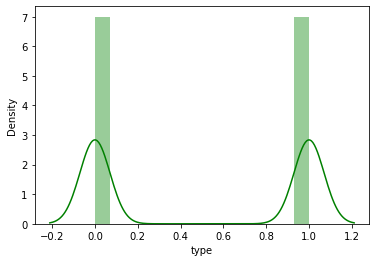

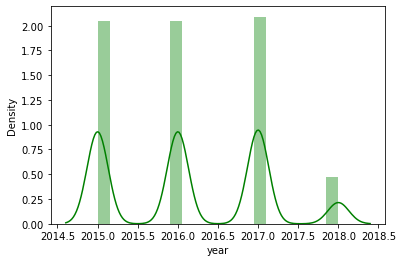

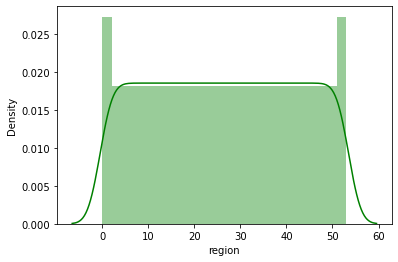

In [43]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], color="g")

Observations :
    
    1. 'Date', 'Average Price' and 'region' are normally distributed.
    2. Some partitions are seen in 'type' and 'year' because they are categorical data.
    3. Rest of the columns have some skewness, which was already to some extend above.

Stripplot :

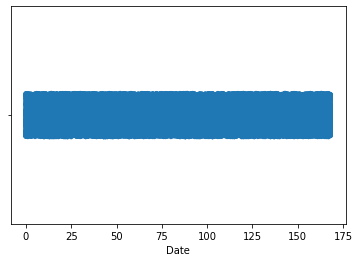

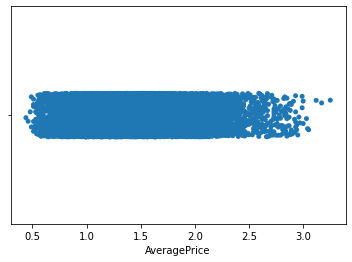

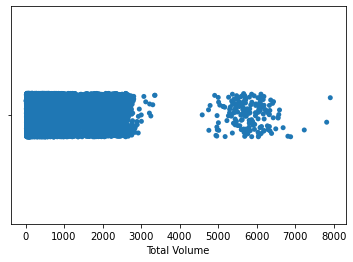

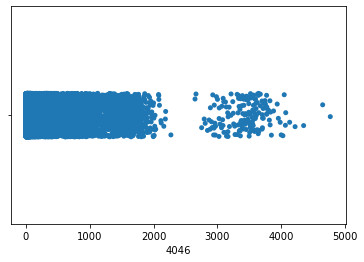

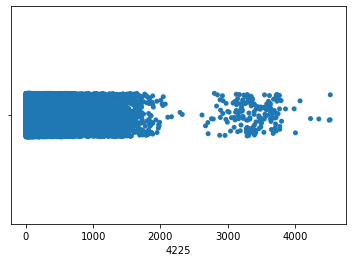

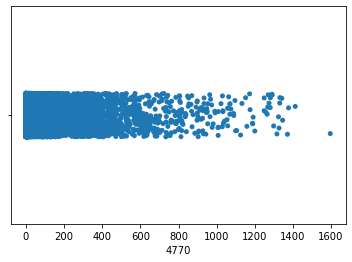

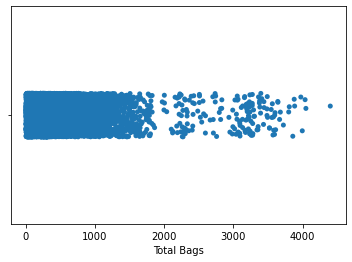

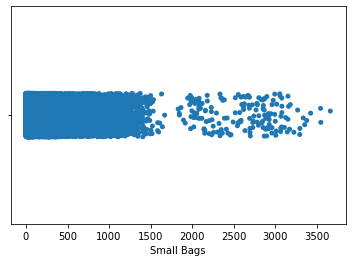

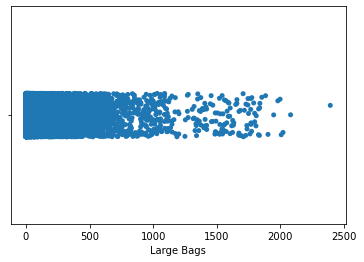

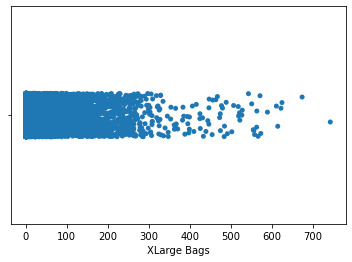

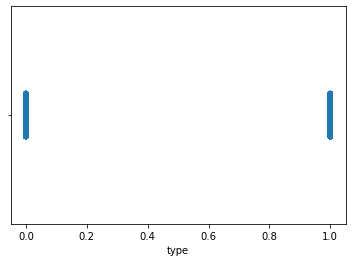

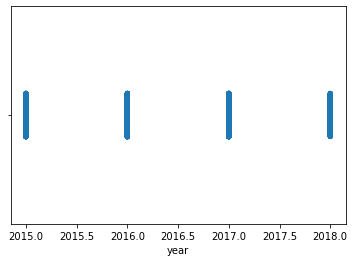

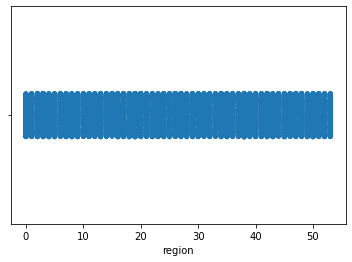

In [44]:
for i in df.columns:
    plt.figure()
    sns.stripplot(df[i])

With the help of stripplot we are able to observe the distribution of various datapoints across the data set and it's range details.

In features like 'total volume', '4046', '4770', 'Total Bags', 'Large Bags', 'XLarge Bags', some single datapoints are far away from the rest of the density, which indicates outliers might be present.

Boxplot :

Date               AxesSubplot(0.125,0.749828;0.227941x0.130172)
AveragePrice    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4046               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4225            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Total Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Small Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.672059,0.437414;0.227941x0.130172)
XLarge Bags        AxesSubplot(0.125,0.281207;0.227941x0.130172)
type            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
year            AxesSubplot(0.672059,0.281207;0.227941x0.130172)
region                AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

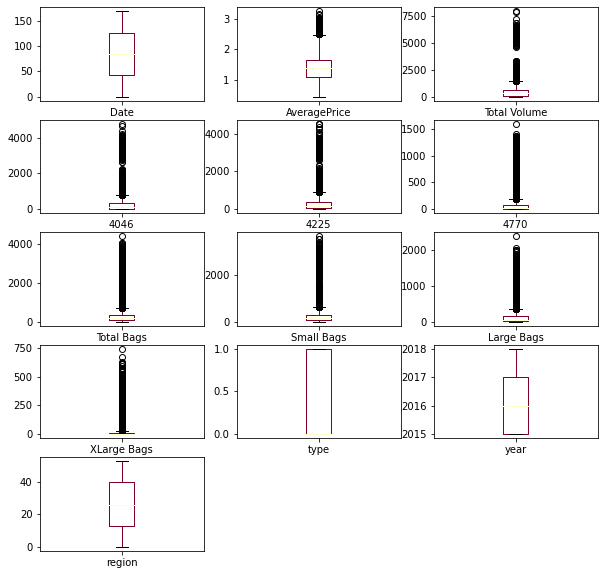

In [45]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(10,10), colormap='YlOrRd_r')

As we can observe here, in many of the columns much outliers are present. Hence we will handle this in the later part of the project.

Histogram :

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

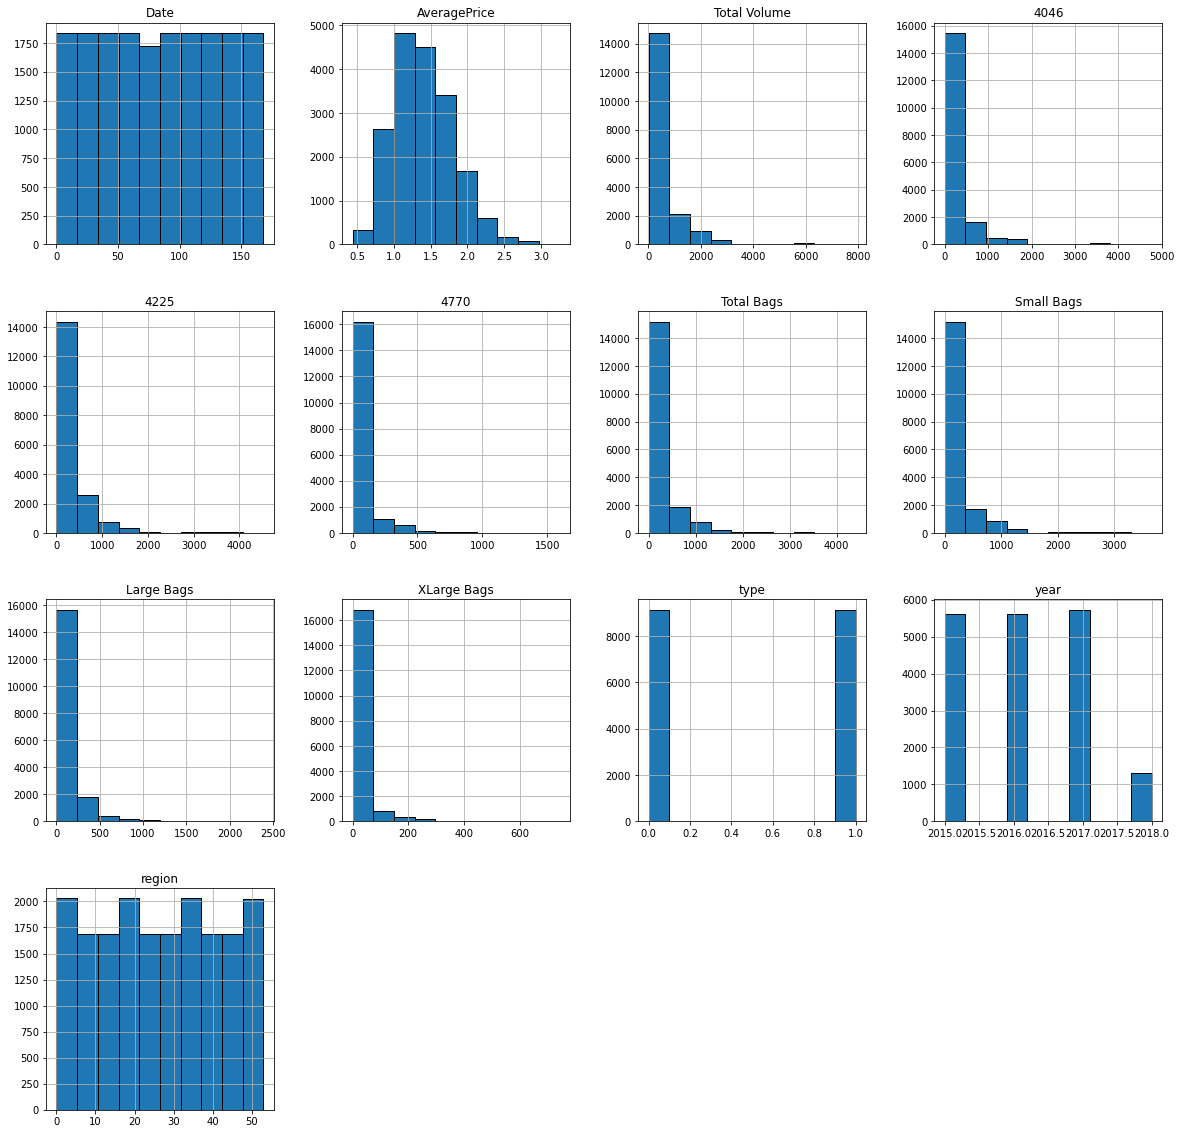

In [46]:
df.hist(edgecolor='black',linewidth=1,figsize=(20,20))

The above histogram indicates presence of skewness and categorical data.

# Bivariate Analysis :

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

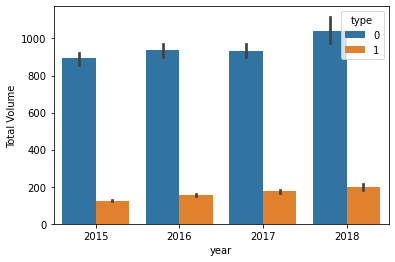

In [47]:
sns.barplot(y='Total Volume',x='year',hue='type',data=df)

So we can see that 2018 had highest volume for type 1 avocados.

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

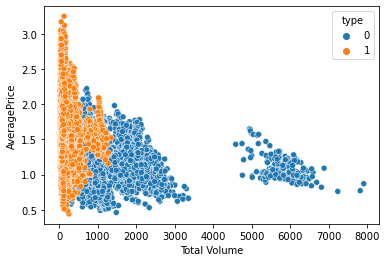

In [48]:
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

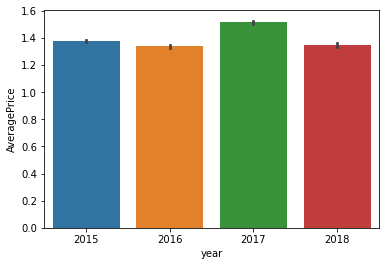

In [49]:
sns.barplot(x='year',y='AveragePrice',data=df)

Average price was highest in the year 2017

<AxesSubplot:xlabel='type', ylabel='region'>

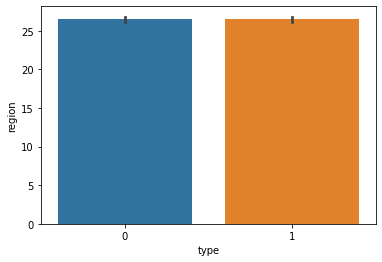

In [50]:
sns.barplot(x='type',y='region',data=df)

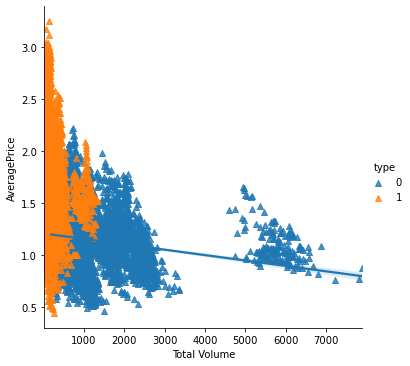

In [51]:
sns.lmplot(x='Total Volume',y='AveragePrice',hue='type', data=df, markers='^')

So that was all about our visualization, lets move further into the project.

# Detecting Outliers :

We have already seen in our univariate analysis that in some columns outliers are present. So lets recheck them :

<AxesSubplot:ylabel='AveragePrice'>

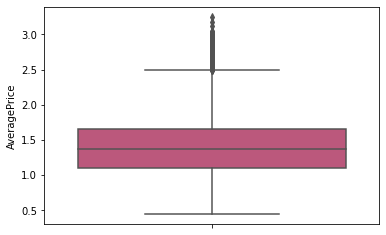

In [52]:
sns.boxplot(y='AveragePrice', data=df, palette='plasma')

<AxesSubplot:ylabel='Total Volume'>

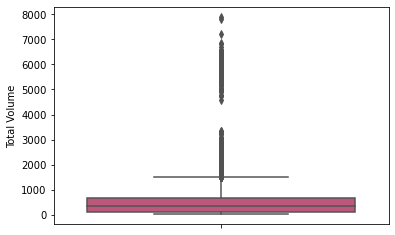

In [53]:
sns.boxplot(y='Total Volume', data=df, palette='plasma')

<AxesSubplot:ylabel='4046'>

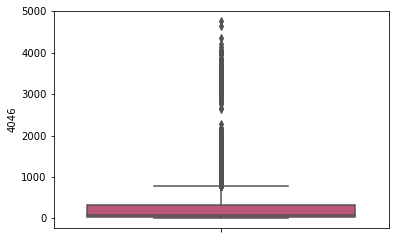

In [54]:
sns.boxplot(y='4046', data=df, palette='plasma')

<AxesSubplot:ylabel='4225'>

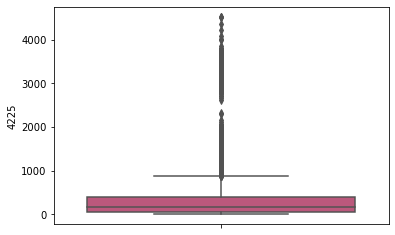

In [55]:
sns.boxplot(y='4225', data=df, palette='plasma')

<AxesSubplot:ylabel='4770'>

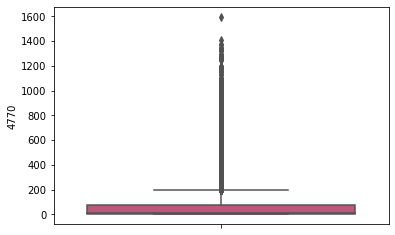

In [56]:
sns.boxplot(y='4770', data=df, palette='plasma')

<AxesSubplot:ylabel='Total Bags'>

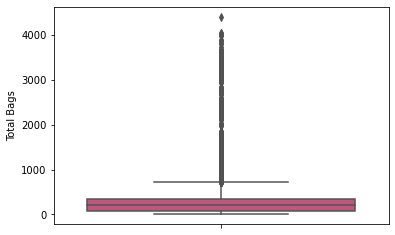

In [57]:
sns.boxplot(y='Total Bags', data=df, palette='plasma')

<AxesSubplot:ylabel='Small Bags'>

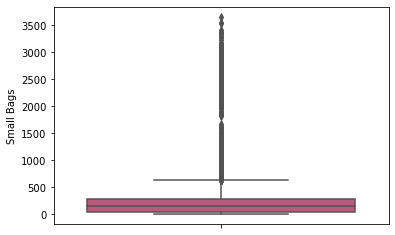

In [58]:
sns.boxplot(y='Small Bags', data=df, palette='plasma')

<AxesSubplot:ylabel='Large Bags'>

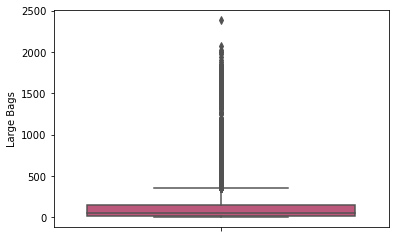

In [59]:
sns.boxplot(y='Large Bags', data=df, palette='plasma')

<AxesSubplot:ylabel='XLarge Bags'>

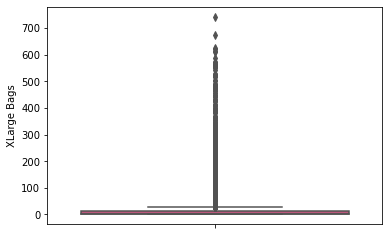

In [60]:
sns.boxplot(y='XLarge Bags', data=df, palette='plasma')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [61]:
# Importing required zscore library

from scipy.stats import zscore
import numpy as np

In [62]:
z=np.abs(zscore(df))

In [63]:
threshold=3

In [64]:
df_new=df[(z<3).all(axis=1)] 

In [65]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (18249, 13)


In [66]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (17129, 13)


In [67]:
# Data loss percentage

loss=((18249-17129)/18249)*100
print('Data loss percentage ',loss)

Data loss percentage  6.137322593018796


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss.
Much of the outliers are removed with 6.13% and we can't afford to lose more data and will proceed further with these values.

In [68]:
df=df_new

In [69]:
df.shape

(17129, 13)

# Classification Part :
For classification our target is 'region'.

# Variance Inflation Factor :


It helps us to eliminate multi co-linearity.

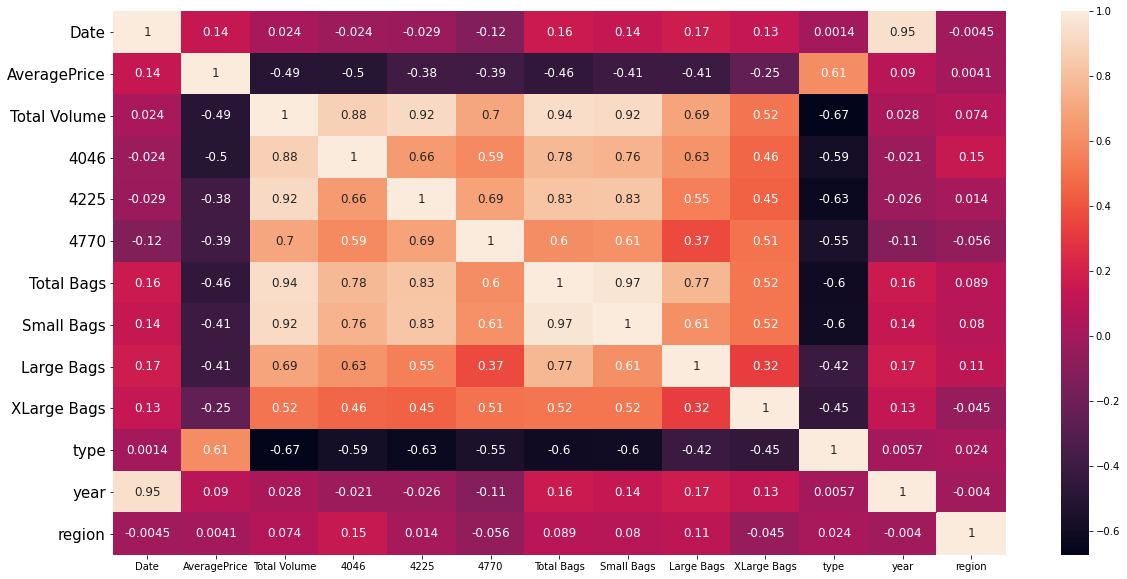

In [70]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

From here, we can find out the columns which are negatively correlated :
    
    1. ['type','Total Volume']
    2. ['type','4046']
    3. ['type','4225']
    4. ['type','4770']
These columns are highly negatively related to each other.

In [71]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Spliting the dataset

x=df.iloc[:,:12] # Data part
x.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,51,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015
1,50,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015
2,49,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015
3,48,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015
4,47,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015


In [73]:
x.shape

(17129, 12)

In [74]:
x.shape[1]

12

In [75]:
# Target

y=df.iloc[:,12]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [76]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [77]:
vif_calc()

    VIF Factor      Features
0     5.092727          Date
1    28.262367  AveragePrice
2   612.342394  Total Volume
3    62.010823          4046
4   110.588944          4225
5     3.375421          4770
6   467.430229    Total Bags
7   251.991353    Small Bags
8    29.146335    Large Bags
9     1.935640   XLarge Bags
10    5.145292          type
11   30.864553          year


Now, here we will find the highest values, which are 'Total Volume', '4225', 'Total Bags', 'Small Bags'.

Now we need to check the individual impact on the target[region], from these attributes.

So, from the above heatmap, i observed that '4225',and '4770' has very less and negative impact on the target[regions]. And hence we can drop them.

In [78]:
df.drop(["4225", "4770"], axis=1, inplace=True)

In [79]:
df.head()

,Date,AveragePrice,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,253.449443,32.198447,93.257010,92.755701,9.656604,0.0,0,2015,0
1,50,1.35,234.258362,25.966902,97.496461,96.995206,9.873702,0.0,0,2015,0
2,49,0.93,343.831674,28.190424,90.251593,89.678370,10.155787,0.0,0,2015,0
3,48,1.08,281.055422,33.645208,76.230965,75.348524,11.565466,0.0,0,2015,0
4,47,1.28,225.919455,30.683546,78.638095,77.370925,14.060228,0.0,0,2015,0


# Feature Scaling :

To transform the dataset into same format, so that we have a uniform dataset.

In [80]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [81]:
x=df.iloc[:,:10]
y=df.iloc[:,10]

In [82]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Date,AveragePrice,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.664474,-0.220715,-0.398040,-0.636956,-0.637858,-0.535028,-0.702551,-0.432519,-1.051103,-1.208338
1,-0.684954,-0.168794,-0.445302,-0.660715,-0.617902,-0.512880,-0.700685,-0.432519,-1.051103,-1.208338
2,-0.705434,-1.259132,-0.175454,-0.652237,-0.652005,-0.551106,-0.698262,-0.432519,-1.051103,-1.208338
3,-0.725914,-0.869726,-0.330054,-0.631439,-0.718004,-0.625970,-0.686150,-0.432519,-1.051103,-1.208338
4,-0.746394,-0.350517,-0.465838,-0.642731,-0.706673,-0.615405,-0.664716,-0.432519,-1.051103,-1.208338
5,-0.766874,-0.402438,-0.439534,-0.628511,-0.692000,-0.596591,-0.688526,-0.432519,-1.051103,-1.208338
6,-0.787354,-1.103370,-0.310775,-0.618653,-0.647504,-0.546624,-0.690599,-0.432519,-1.051103,-1.208338
7,-0.807834,-1.129330,-0.207549,-0.658574,-0.687839,-0.606040,-0.581772,-0.432519,-1.051103,-1.208338
8,-0.828314,-1.025488,-0.244169,-0.637822,-0.574502,-0.469084,-0.640771,-0.432519,-1.051103,-1.208338
9,-0.848794,-0.895686,-0.350751,-0.649058,-0.639652,-0.550545,-0.581395,-0.432519,-1.051103,-1.208338


# Power Transformation :

I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [83]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [84]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Date,AveragePrice,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.661574,-0.148068,-0.198831,-0.850752,-0.677528,-0.482017,-0.974052,-0.612097,-1.051103,-1.257554
1,-0.682225,-0.093493,-0.285825,-0.926222,-0.636508,-0.438568,-0.968464,-0.612097,-1.051103,-1.257554
2,-0.702879,-1.332706,0.166568,-0.899089,-0.706932,-0.513987,-0.961217,-0.612097,-1.051103,-1.257554
3,-0.723538,-0.869949,-0.079506,-0.833484,-0.847675,-0.667652,-0.925234,-0.612097,-1.051103,-1.257554
4,-0.744200,-0.286765,-0.324663,-0.868936,-0.823093,-0.645486,-0.862500,-0.612097,-1.051103,-1.257554


Let's again check our VIF after power transformation

In [85]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [86]:
vif_calc()

   VIF Factor      Features
0   11.654954          Date
1    2.072975  AveragePrice
2   25.415503  Total Volume
3    5.235855          4046
4   59.787358    Total Bags
5   32.725385    Small Bags
6    4.775158    Large Bags
7    1.793992   XLarge Bags
8    3.944490          type
9   11.129348          year


As we can observe here, after power transformation, the VIF values has reduced to a good exceptable range, and so we can proceed further with this dataset.

# Machine Learning Models :

Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [137]:
# Importing the necessary libraries :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Spliting dataframe and finding best random state :

In [93]:
lr=LogisticRegression()

In [94]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 21  The model performs very well
At random_state:- 21
Training accuracy_score is:- 44.99014814274246
Testing accuracy_score is:- 44.95037945125511 


At random state 109  The model performs very well
At random_state:- 109
Training accuracy_score is:- 44.588776180398455
Testing accuracy_score is:- 44.60011675423234 


At random state 245  The model performs very well
At random_state:- 245
Training accuracy_score is:- 44.559585492227974
Testing accuracy_score is:- 44.57092819614711 


At random state 331  The model performs very well
At random_state:- 331
Training accuracy_score is:- 44.49390644384441
Testing accuracy_score is:- 44.54173963806188 


At random state 377  The model performs very well
At random_state:- 377
Training accuracy_score is:- 44.49390644384441
Testing accuracy_score is:- 44.454173963806184 


At random state 382  The model performs very well
At random_state:- 382
Training accuracy_score is:- 44.77851565350653
Testing accuracy_score is:- 44.833625218

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

657 random state with accuracy score 44.9

# Required Evaluation Metrices :

In [95]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=657)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    

In [98]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
    
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

I am not using GaussianNB because it is used when there are ony 2 categories in the output, but we have more than 2 outputs in our target.

And also I am not using Ensemble techniques because our dataset is not very large.

In [99]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.44921190893169877
[[20  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  1]
 [ 0  0 45 ...  0  0  1]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  1 20  0]
 [ 0  4  1 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.28      0.30      0.29        66
           1       0.26      0.38      0.31        64
           2       0.61      0.60      0.60        75
           3       0.33      0.35      0.34        69
           4       0.41      0.46      0.44        63
           5       0.42      0.51      0.46        67
           6       0.71      0.70      0.71        43
           7       0.25      0.19      0.22        74
           8       0.68      0.86      0.76        69
           9       0.58      0.83      0.68        65
          10       0.44      0.30      0.35        71
          11       0.45      0.69      0.55        72
          12       0.34      0.41      0.37        66
          13       0.52 

MultinomialNB also didnt work because of the negative values in our dataset

So, from above all the models, we found the highest score :
    
    Accuracy score of KNeighborsClassifier() is: 0.737594862813777

# Cross validation score for KNeighborsClassifier() :

In [106]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_train, y_train)
pred=knc.predict(x_test)
acc=accuracy_score(y_test,pred)
for i in range(2,10):
    cross=cross_val_score(knc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 6.719593252466985
Accuracy score is: 73.75948628137769


At cv:- 3
Cross validation score is:- 24.57201107171244
Accuracy score is: 73.75948628137769


At cv:- 4
Cross validation score is:- 32.388663217048205
Accuracy score is: 73.75948628137769


At cv:- 5
Cross validation score is:- 36.72636642932321
Accuracy score is: 73.75948628137769


At cv:- 6
Cross validation score is:- 34.06501296201069
Accuracy score is: 73.75948628137769


At cv:- 7
Cross validation score is:- 41.57277132348649
Accuracy score is: 73.75948628137769


At cv:- 8
Cross validation score is:- 42.52917070611523
Accuracy score is: 73.75948628137769


At cv:- 9
Cross validation score is:- 43.98766775934406
Accuracy score is: 73.75948628137769




In [107]:
score_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.3649857122740496 
The accuracy score is:  0.737594862813777


# Hyper Parameter Tuning :

Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of KNeighborsClassifier() :

In [ ]:
KNeighborsClassifier(n_neighbors=5, #default
                    weights={'uniform', 'distance'},
                    algorithm={'auto', 'ball_tree', 'kd_tree', 'brute'},
                    leaf_size=30, #default
                    p={1,2},
                    metric={'minkowski','sparse graph'},
                    metric_params=None, #default
                    n_jobs=None) #default

These are the various parameters for KNeighborsClassifier(), which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [115]:
params={'n_neighbors':[5],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':[30],
        'p':[1,2],
        'metric':['minkowski','sparse graph'],
        'metric_params':[None],
        'n_jobs':[None]}

In [116]:
grid=GridSearchCV(KNeighborsClassifier(), params, cv=9)

In [117]:
grid.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30],
                         'metric': ['minkowski', 'sparse graph'],
                         'metric_params': [None], 'n_jobs': [None],
                         'n_neighbors': [5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [118]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

So here we have found the best parameters for our model, and now we can finally train our model.

In [119]:
KNC=KNeighborsClassifier(n_neighbors=5,
                    weights='distance',
                    algorithm='auto',
                    leaf_size=30,
                    p=1,
                    metric='minkowski',
                    metric_params=None,
                    n_jobs=None)

In [120]:
KNC.fit(x_train,y_train)
KNC.score(x_train, y_train)
pred=KNC.predict(x_test)
print('Accuracy score of',KNC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of KNeighborsClassifier(p=1, weights='distance') is:
0.7936368943374197
[[61  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  1  0 ...  0  0 52]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        66
           1       0.70      0.77      0.73        64
           2       0.86      0.80      0.83        75
           3       0.86      0.72      0.79        69
           4       0.92      0.87      0.89        63
           5       0.86      0.82      0.84        67
           6       1.00      0.91      0.95        43
           7       0.70      0.70      0.70        74
           8       0.97      0.90      0.93        69
           9       0.75      0.78      0.77        65
          10       0.59      0.52      0.55        71
          11       0.75      0.79      0.77        72
          12       0.96      0.82      0.89        66


So, this is the best model that we have achieved.

# AUC ROC Curve :

In [138]:
pred_prob=KNC.predict_proba(x_test) 

In [139]:
fpr={} 
tpr={} 
thresh={} 
n_class=54 

In [140]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [141]:
import random 
color=['orange','blue','green','red','pink','yellow','black'] 

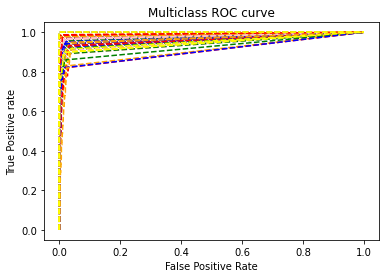

In [143]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
plt.title('Multiclass ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.savefig('Multiclass ROC',dpi=300);

# Saving the best model :

In [130]:
import pickle
filename='Best_model_for_Avocado.pkl'
pickle.dump(KNC,open(filename,'wb'))

# Regression Part :

For regression part our target is 'AveragePrice'.

# Variance Inflation Factor :

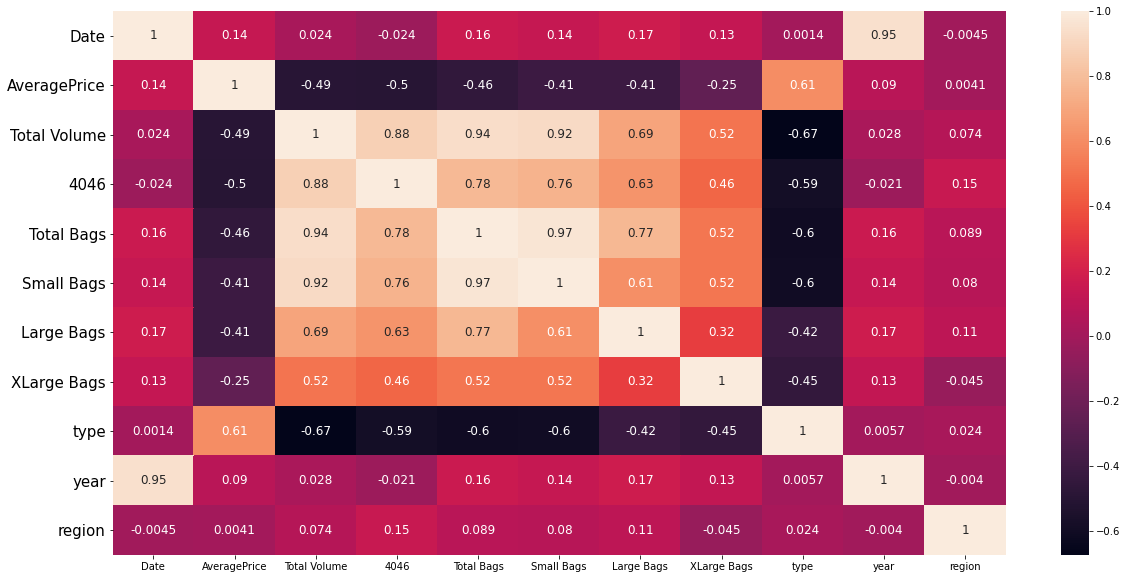

In [144]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

From here, we can find out the columns which are negatively correlated :

1. ['type','Total Volume']
2. ['type','4046']
3. ['AveragePrice','Total Volume']
4. ['AveragePrice','Total Bags']

These columns are highly negatively related to each other.

In [146]:
# Spliting the dataset

x=df.drop('AveragePrice', axis=1) # Data part
x.head()

,Date,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,253.449443,32.198447,93.257010,92.755701,9.656604,0.0,0,2015,0
1,50,234.258362,25.966902,97.496461,96.995206,9.873702,0.0,0,2015,0
2,49,343.831674,28.190424,90.251593,89.678370,10.155787,0.0,0,2015,0
3,48,281.055422,33.645208,76.230965,75.348524,11.565466,0.0,0,2015,0
4,47,225.919455,30.683546,78.638095,77.370925,14.060228,0.0,0,2015,0


In [148]:
x.shape[1]

10

In [149]:
# Target

y=df.AveragePrice
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [151]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [152]:
vif_calc()

   VIF Factor      Features
0    4.762068          Date
1   39.786351  Total Volume
2    8.129495          4046
3  415.623193    Total Bags
4  241.657676    Small Bags
5   28.432168    Large Bags
6    1.792290   XLarge Bags
7    4.077198          type
8   13.816514          year
9    4.132261        region


Now, here we will find the highest values, which are 'Total Bags', 'Small Bags'.

Now we need to check the individual impact on the target[AveragePrice], from these attributes.

So, from the above heatmap, i observed that 'Total Volume',and 'Total Bags' has very less and negative impact on the target[AveragePrice], even lesser than 'Small Bags'. But previously already 2 columns were dropped, hence we not like to lose more data.

# Feature Scaling :

In [153]:
x=df.drop('AveragePrice', axis=1)
y=df.AveragePrice

In [154]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Date,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.664474,-0.398040,-0.636956,-0.637858,-0.535028,-0.702551,-0.432519,-1.051103,-1.208338,-1.693945
1,-0.684954,-0.445302,-0.660715,-0.617902,-0.512880,-0.700685,-0.432519,-1.051103,-1.208338,-1.693945
2,-0.705434,-0.175454,-0.652237,-0.652005,-0.551106,-0.698262,-0.432519,-1.051103,-1.208338,-1.693945
3,-0.725914,-0.330054,-0.631439,-0.718004,-0.625970,-0.686150,-0.432519,-1.051103,-1.208338,-1.693945
4,-0.746394,-0.465838,-0.642731,-0.706673,-0.615405,-0.664716,-0.432519,-1.051103,-1.208338,-1.693945
5,-0.766874,-0.439534,-0.628511,-0.692000,-0.596591,-0.688526,-0.432519,-1.051103,-1.208338,-1.693945
6,-0.787354,-0.310775,-0.618653,-0.647504,-0.546624,-0.690599,-0.432519,-1.051103,-1.208338,-1.693945
7,-0.807834,-0.207549,-0.658574,-0.687839,-0.606040,-0.581772,-0.432519,-1.051103,-1.208338,-1.693945
8,-0.828314,-0.244169,-0.637822,-0.574502,-0.469084,-0.640771,-0.432519,-1.051103,-1.208338,-1.693945
9,-0.848794,-0.350751,-0.649058,-0.639652,-0.550545,-0.581395,-0.432519,-1.051103,-1.208338,-1.693945


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [155]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Date,Total Volume,4046,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.661574,-0.198831,-0.850752,-0.677528,-0.482017,-0.974052,-0.612097,-1.051103,-1.257554,-1.698623
1,-0.682225,-0.285825,-0.926222,-0.636508,-0.438568,-0.968464,-0.612097,-1.051103,-1.257554,-1.698623
2,-0.702879,0.166568,-0.899089,-0.706932,-0.513987,-0.961217,-0.612097,-1.051103,-1.257554,-1.698623
3,-0.723538,-0.079506,-0.833484,-0.847675,-0.667652,-0.925234,-0.612097,-1.051103,-1.257554,-1.698623
4,-0.744200,-0.324663,-0.868936,-0.823093,-0.645486,-0.862500,-0.612097,-1.051103,-1.257554,-1.698623


Let's again check our VIF after power transformation

In [156]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [157]:
vif_calc()

   VIF Factor      Features
0   10.918985          Date
1   24.900960  Total Volume
2    5.326340          4046
3   55.665398    Total Bags
4   31.244648    Small Bags
5    4.770351    Large Bags
6    1.794113   XLarge Bags
7    3.481552          type
8   10.799279          year
9    1.086789        region


As we can observe here, after power transformation, the VIF values has reduced to a good exceptable range, and so we can proceed further with this dataset.

# Machine Learning Models :

Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [158]:
# Importing the necessary libraries :

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Spliting dataframe and finding best random state :

In [160]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.536018198321331 on random state 957


Hence we found our best random state value 957 with highest r2 score 0.53.

# Required Evaluation Metrices :

In [161]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=957)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [162]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 0.2628493890095068
r2 Score is: 53.6018198321331
Cross Validation Score: 6.981914755528318
Difference between r2 Score and Cross Validation Score is 46.61990507660479


In [163]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 0.2630018164579652
r2 Score is: 53.547991235558634
Cross Validation Score: 7.510299256724869
Difference between r2 Score and Cross Validation Score is 46.03769197883376


In [164]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 0.32167818539366444
r2 Score is: 30.508734009525096
Cross Validation Score: -42.26056116942754
Difference between r2 Score and Cross Validation Score is 72.76929517895263


In [165]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 0.26287440446694804
r2 Score is: 53.592987953645924
Cross Validation Score: 7.0733242867641195
Difference between r2 Score and Cross Validation Score is 46.519663666881804


In [166]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.23279415688905553
r2 Score is: 63.60588575794901
Cross Validation Score: -19.839140420920657
Difference between r2 Score and Cross Validation Score is 83.44502617886967


In [167]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.2634956282461708
r2 Score is: 53.37339104066421
Cross Validation Score: 5.247106547794004
Difference between r2 Score and Cross Validation Score is 48.126284492870205


In [168]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 0.19586230383964126
r2 Score is: 74.23745754371414
Cross Validation Score: 18.053438037102026
Difference between r2 Score and Cross Validation Score is 56.18401950661212


In [169]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 0.29239614389053575
r2 Score is: 42.5843501069843
Cross Validation Score: -147.40142471545022
Difference between r2 Score and Cross Validation Score is 189.9857748224345


In [170]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 0.13549853033197418
r2 Score is: 87.67019600582438
Cross Validation Score: 36.91048082597983
Difference between r2 Score and Cross Validation Score is 50.75971517984455


In [171]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 0.13549853033197418
r2 Score is: 87.67019600582438
Cross Validation Score: 36.91048082597983
Difference between r2 Score and Cross Validation Score is 50.75971517984455


In [172]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 0.18636675847411366
r2 Score is: 76.674878951929
Cross Validation Score: 48.1639465384759
Difference between r2 Score and Cross Validation Score is 28.510932413453105


In [173]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 0.2514008633325175
r2 Score is: 57.55558689597598
Cross Validation Score: 10.071546865124297
Difference between r2 Score and Cross Validation Score is 47.48404003085168


In [176]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 0.11530264965746471
r2 Score is: 91.07176570952554
Cross Validation Score: 44.89776581935583
Difference between r2 Score and Cross Validation Score is 46.1739998901697


After finding all the scores of various models, we found that ExtraTreesRegressor model gives the highest r2 score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :

Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of ExtraTreesRegressor Model

In [ ]:
ExtraTreesRegressor(n_estimators=300,
    criterion={"squared_error", "absolute_error"},
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features={"auto", "sqrt", "log2"},
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

These are the various parameters for ExtraTreesRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [183]:
params={'n_estimators':[300],
    'criterion':["squared_error", "absolute_error"],
    'max_features':["auto", "sqrt", "log2"]}

# Here i have taken only some parameters as it was taking a long time to execute all of them.

In [184]:
grid=GridSearchCV(ExtraTreesRegressor(), params, cv=5)

In [185]:
grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
#grid.best_params_

I could not perform hyper parameter tuning as it was taking a very long time to execute, around 11-12 hours.

So, We have got ExtraTreesRegressor model which gives the best results :

Mean Square Error Score is: 0.11530264965746471

r2 Score is: 91.07176570952554

Cross Validation Score: 44.89776581935583

Difference between r2 Score and Cross Validation Score is 46.1739998901697

# SERIALIZATION :

In [188]:
import pickle
filename='bestavacado.pkl'
pickle.dump(ExtraTreesRegressor(),open(filename,'wb'))